In [1]:
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
from scipy.special import logit, expit
np.set_printoptions(precision=3)

%matplotlib inline
plt.style.use('physics')

plt.rcParams['axes.grid'       ]  = False
plt.rcParams['xtick.labelsize' ]  = 14
plt.rcParams['ytick.labelsize' ]  = 14
plt.rcParams['axes.labelsize'  ]  = 14
plt.rcParams['legend.fancybox' ]  = False

pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_hdf('../../data-driven/data/hgg-double-fake-trees-training-2017.h5')
df.columns

Index([u'Y', u'Z', u'avg_et', u'avg_pt', u'cr_region', u'diff_et',
       u'dijet_LeadJPt', u'dijet_Mjj', u'dijet_SubJPt', u'dijet_Zep',
       u'dijet_abs_dEta', u'dijet_dipho_dphi', u'dijet_dipho_dphi_trunc',
       u'dijet_dphi', u'dijet_leadEta', u'dijet_minDRJetPho', u'dijet_mva',
       u'dijet_subleadEta', u'dipho_PToM', u'dipho_cosphi', u'dipho_leadEt',
       u'dipho_leadEta', u'dipho_leadIDMVA', u'dipho_leadPt',
       u'dipho_lead_elveto', u'dipho_lead_sieie', u'dipho_mass', u'dipho_mva',
       u'dipho_subleadEt', u'dipho_subleadEta', u'dipho_subleadIDMVA',
       u'dipho_subleadPt', u'dipho_sublead_elveto', u'dipho_sublead_sieie',
       u'eta_cat', u'fail_id', u'isvbf', u'leadPho_PToM', u'lead_eta_cat',
       u'm_sideband', u'max_eta', u'max_id', u'min_eta', u'min_id',
       u'n_jet_30', u'pass_id', u'sample', u'sublPho_PToM', u'subl_eta_cat',
       u'weight', u'weight_bins'],
      dtype='object')

In [12]:
def vbf_presel(data):
    return (
        (data["leadPho_PToM"       ]> (1/3.0))&
        (data["sublPho_PToM"       ]> (1/4.0))&
        (data["dijet_LeadJPt"      ]> 30     )& 
        (data["dijet_SubJPt"       ]> 20     )&
        (data["dijet_Mjj"          ]> 250    )&
        (data["dipho_mass"         ]> 100    )&
        (data["dipho_mass"         ]< 180    ))

df = df[vbf_presel(df)]

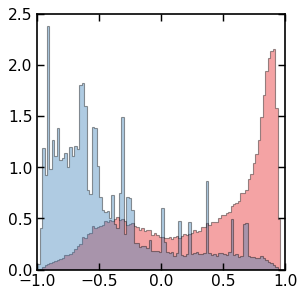

In [13]:
plt.figure(figsize=(4,4))

plt.hist(df[df.Y==1].dijet_mva,bins=100, range=[-1,1], 
         alpha=0.4, weights=df[df.Y==1].weight, 
         histtype='stepfilled',lw=1, normed=1)
plt.hist(df[df.Y==0].dijet_mva,bins=100, range=[-1,1], 
         alpha=0.4, weights=df[df.Y==0].weight, 
         histtype='stepfilled',lw=1, normed=1)
# plt.yscale('log')
plt.show()

In [1]:
from scipy.interpolate import interp1d
    
class empirical_cdf(object):
    def __init__(self, x, weights=None):
        if weights is None:
            weights = np.ones(x.shape[0])
        self._data = np.column_stack([x,weights])
        print self._data
        self._data = self._data[self._data[:,0].argsort()]
        self._data = np.column_stack([x,weights])
        x = self._data[:,0]
        y = self._data[:,1].cumsum()/self._data[:,1].sum()
        self.fcn = interp1d(x,y, bounds_error=False)
    def fcn(self):
        return self.fcn

In [3]:
f = empirical_cdf(X[Y==0],weights=W[Y==0])
f.fcn([0.5])

NameError: name 'X' is not defined

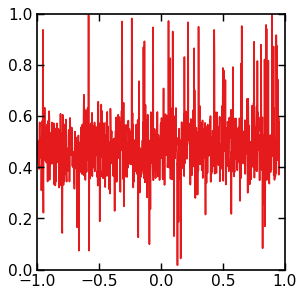

In [177]:


plt.figure(figsize=(4,4))
# plt.plot(xb,Fb)
t = np.linspace(-1,1,1000)
plt.plot(t,f.fcn(t), '-')
plt.show()

In [18]:
from scipy.interpolate import interp1d

class StepFunction(object):
    def __init__(self, x, y, ival=0., sorted=False, side='left'):
        if side.lower() not in ['right', 'left']:
            msg = "side can take the values 'right' or 'left'"
            raise ValueError(msg)
        self.side = side

        _x = np.asarray(x)
        _y = np.asarray(y)

        if _x.shape != _y.shape:
            msg = "x and y do not have the same shape"
            raise ValueError(msg)
        if len(_x.shape) != 1:
            msg = 'x and y must be 1-dimensional'
            raise ValueError(msg)

        self.x = np.r_[-np.inf, _x]
        self.y = np.r_[ival, _y]

        if not sorted:
            asort = np.argsort(self.x)
            self.x = np.take(self.x, asort, 0)
            self.y = np.take(self.y, asort, 0)
        self.n = self.x.shape[0]

    def __call__(self, time):

        tind = np.searchsorted(self.x, time, self.side) - 1
        return self.y[tind]

class _ecdf(StepFunction):
    def __init__(self, x, weights=None, side='right'):
        step = True
        if step: 
            x = np.array(x, copy=True)
            x.sort()
            nobs  = weights.sum()
            shape = len(x)
            y = np.linspace(1./nobs,1,shape)
            super(_ecdf, self).__init__(x, y, side=side, sorted=True)
        else:
            return interp1d(x,y,drop_errors=False,fill_values=ival)

In [19]:
ecdf = _ecdf(X[Y==1])
plt.figure(figsize=(4,4))
plt.plot(xs,Fs)
plt.plot(xb,Fb)

plt.plot([0.2,0.8],ecdf([0.2,0.8]),'ro')

plt.show()

NameError: name 'X' is not defined

In [4]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=10, min_weight_fraction_leaf=0.1)
clf = clf.fit(X[:, None], Y, sample_weight=W)

In [5]:
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("tree.pdf") 

True

In [6]:
with open("tree.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

In [7]:
import os
os.unlink('tree.dot')

In [8]:
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_png("tree_b.png") 

True

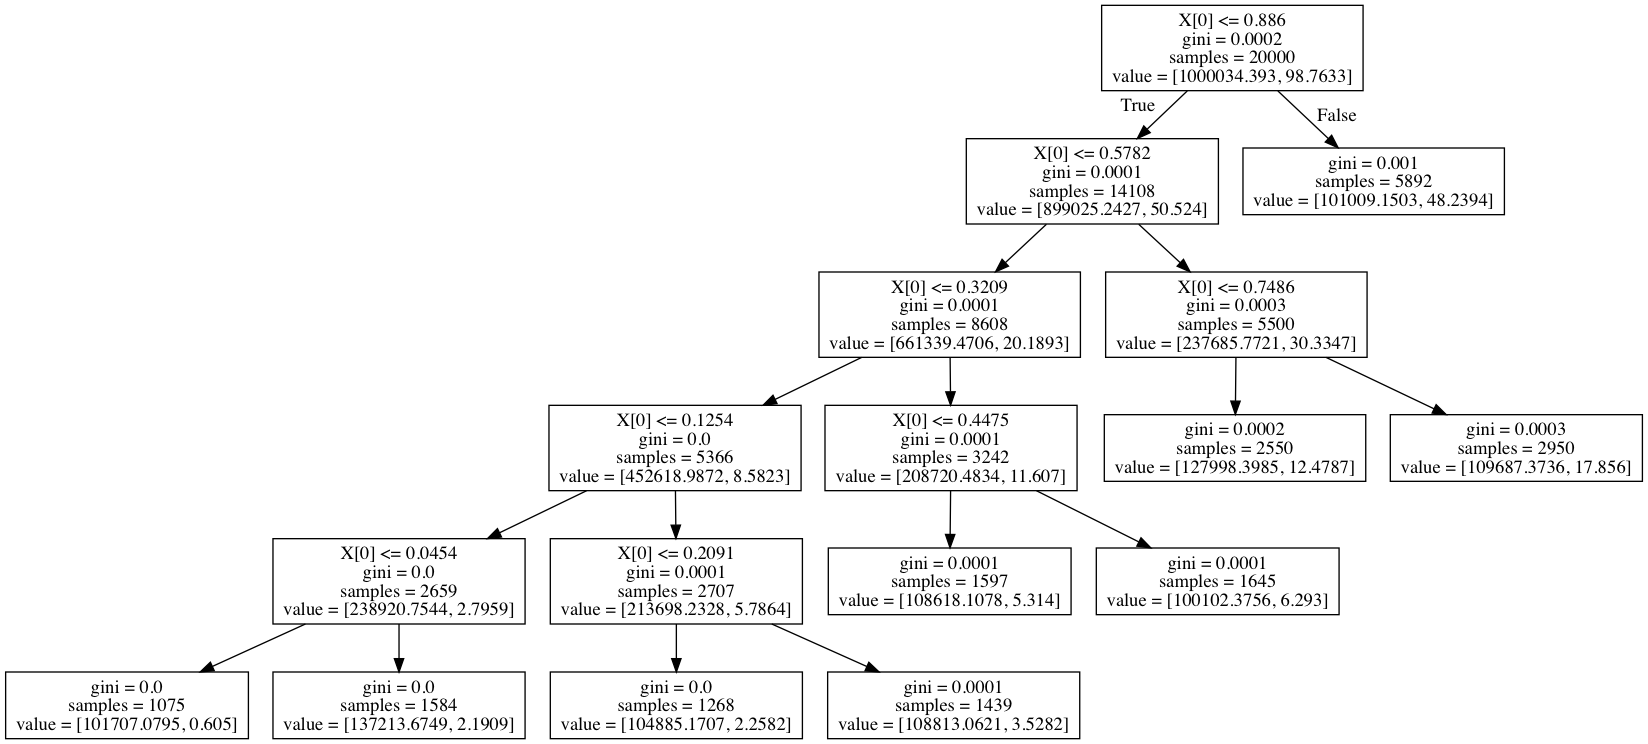

In [9]:
from IPython.display import Image
Image(filename='tree_b.png')

In [18]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print "def tree({}):".format(", ".join(feature_names))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print "{}if {} <= {}:".format(indent, name, threshold)
            recurse(tree_.children_left[node], depth + 1)
            print "{}else:  # if {} > {}".format(indent, name, threshold)
            recurse(tree_.children_right[node], depth + 1)
        else:
            print "{}return {}".format(indent, tree_.value[node])

    recurse(0, 1)
    
def get_boundaries(tree):
    tree_ = tree.tree_
    cuts  = []
    value = []
    w = []
    def recurse(node, depth):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            cuts.append(tree_.threshold[node])
            value.append(tree_.value[node])
            w.append(tree_.weighted_n_node_samples[node])
    
            recurse(tree_.children_left [node], depth + 1)
            recurse(tree_.children_right[node], depth + 1)
    recurse(0, 1)
    
    return np.array(cuts), np.array(value), np.array(w)

In [19]:
cuts_, value_, w_ =  get_boundaries(clf)
print cuts_
print value_
print w_

[ 0.886  0.578  0.321  0.125  0.045  0.209  0.447  0.749]
[[[  1.000e+06   9.876e+01]]

 [[  8.990e+05   5.052e+01]]

 [[  6.613e+05   2.019e+01]]

 [[  4.526e+05   8.582e+00]]

 [[  2.389e+05   2.796e+00]]

 [[  2.137e+05   5.786e+00]]

 [[  2.087e+05   1.161e+01]]

 [[  2.377e+05   3.033e+01]]]
[ 1000133.156   899075.767   661359.66    452627.57    238923.55
   213704.019   208732.09    237716.107]


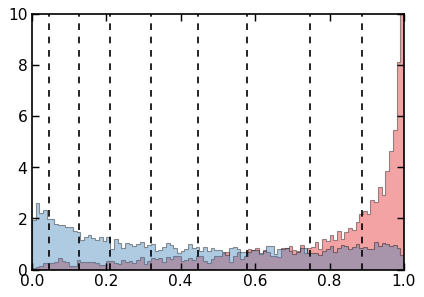

In [20]:
plt.figure(figsize=(6,4))
plt.hist(X[Y==1],bins=100, range=[0,1], alpha=0.4, weights=W[Y==1], histtype='stepfilled',lw=1, normed=True)
plt.hist(X[Y==0],bins=100, range=[0,1], alpha=0.4, weights=W[Y==0], histtype='stepfilled',lw=1, normed=True)
# plt.yscale('log')

for i,x in enumerate(cuts_):
    plt.axvline(x, ls='--',c='k',label=i)
plt.show()

In [21]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf,X[:, None], Y, cv=10, fit_params={"sample_weight":W})

array([ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5])

In [22]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

rdf = RandomForestClassifier(max_depth=10, min_weight_fraction_leaf=0.1, n_estimators=500)
rdf = rdf.fit(X[:, None], Y, sample_weight=W)

In [23]:
def evaluate_sklearn(cls, vals, coef=1):
    scale = 1.0 / cls.n_estimators
    ret = np.zeros(vals.shape[0])

    learning_rate = cls.learning_rate
    for itree, t in enumerate(cls.estimators_[:, 0]):
        r = t.predict(vals)
        ret += r * scale
    return 2.0/(1.0 + np.exp(-coef/learning_rate * ret)) - 1

def boosted_bounds(cls):
    cuts_  = np.empty([cls.n_estimators,cls.max_depth], dtype=np.ndarray)
    for i, t in enumerate(cls.estimators_[:, 0]):
        tree_ = t.tree_
        def recurse(node, depth):
            if tree_.feature[node] != _tree.TREE_UNDEFINED:
                cuts_[i,depth-1] = tree_.threshold[node]
                if tree_.threshold[node]==None: print 'none stuff : ', i , depth-1
                recurse(tree_.children_left [node], depth + 1)
                recurse(tree_.children_right[node], depth + 1)
        recurse(0, 1)
    cuts_ = np.nan_to_num(np.array(cuts_, dtype=np.float))
    return cuts_

def get_boundaries(cls):
    cuts_  = np.empty([cls.n_estimators,cls.max_depth], dtype=np.ndarray)
    for i, t in enumerate(cls.estimators_):
        tree_ = t.tree_
        cuts = []
        def recurse(node, depth):
            if tree_.feature[node] != _tree.TREE_UNDEFINED:
                cuts_[i,depth-1] = tree_.threshold[node]
                recurse(tree_.children_left [node], depth + 1)
                recurse(tree_.children_right[node], depth + 1)
        recurse(0, 1)
        
    cuts_ = np.nan_to_num(np.array(cuts_, dtype=np.float))
    return cuts_

In [24]:
cuts = get_boundaries(rdf)

print 'average :', np.mean(cuts, axis=0)
print 'std     :', np.std(cuts, axis=0)

m_cuts = np.mean(cuts, axis=0)
e_cuts = np.std(cuts, axis=0)

average : [ 0.883  0.575  0.673  0.36   0.141  0.027  0.     0.     0.     0.   ]
std     : [ 0.005  0.058  0.157  0.14   0.072  0.053  0.     0.     0.     0.   ]


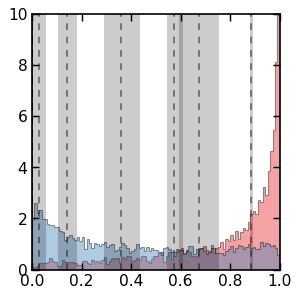

In [25]:
plt.figure(figsize=(4,4))
plt.hist(X[Y==1],bins=100, range=[0,1], alpha=0.4, weights=W[Y==1], histtype='stepfilled',lw=1, normed=True)
plt.hist(X[Y==0],bins=100, range=[0,1], alpha=0.4, weights=W[Y==0], histtype='stepfilled',lw=1, normed=True)
# plt.yscale('log')

for i,x in enumerate(m_cuts):
    plt.axvline(x, ls='--',c='k',alpha=0.5, label=i)
    plt.axvspan(x - e_cuts[i]/2, x + e_cuts[i]/2,facecolor='k',alpha=0.2)
plt.show()

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

gmb = GradientBoostingClassifier(max_depth=4, min_weight_fraction_leaf=0.1, n_estimators=40)
gmb = gmb.fit(X[:, None], Y, sample_weight=W)

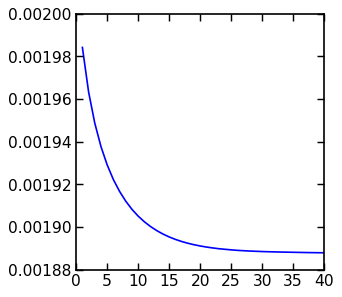

In [52]:
plt.figure(figsize=(4,4))
plt.plot(np.arange(gmb.n_estimators) + 1, 
         gmb.train_score_, 'b-', label='Deviance')


In [58]:
"""
['__class__', '__delattr__', '__doc__', '__format__', 
'__getattribute__', '__getstate__', '__hash__', '__init__', 
'__new__', '__pyx_vtable__', '__reduce__', '__reduce_ex__', 
'__repr__', '__setattr__', '__setstate__', '__sizeof__', 
'__str__', '__subclasshook__', 'apply', 'capacity', 'children_left', 
'children_right', 'compute_feature_importances', 'decision_path', 
'feature', 'impurity', 'max_depth', 'max_n_classes', 'n_classes', 
'n_features', 'n_node_samples', 'n_outputs', 'node_count', 'predict', 
'threshold', 'value', 'weighted_n_node_samples']
"""

def boosted_bounds(cls):
    cuts_  = np.empty([cls.n_estimators,cls.max_depth], dtype=np.ndarray)
    bwei_  = np.empty([cls.n_estimators,cls.max_depth], dtype=np.ndarray)
    for i, t in enumerate(cls.estimators_[:, 0]):
        tree_ = t.tree_
        def recurse(node, depth):
            if tree_.feature[node] != _tree.TREE_UNDEFINED:
                cuts_[i,depth-1] = tree_.threshold[node]
                bwei_[i,depth-1] = tree_.value[node]
                if tree_.threshold[node]==None: print 'none stuff : ', i , depth-1
                recurse(tree_.children_left [node], depth + 1)
                recurse(tree_.children_right[node], depth + 1)
        recurse(0, 1)
    cuts_ = np.nan_to_num(np.array(cuts_, dtype=np.float))
    bwei_ = np.nan_to_num(np.array(bwei_, dtype=np.float))
    return cuts_, bwei_

cuts,bwei = boosted_bounds(gmb)

[[ 0.886  0.578  0.749  0.447]
 [ 0.886  0.578  0.749  0.447]
 [ 0.88   0.507  0.741  0.379]
 [ 0.88   0.578  0.748  0.447]
 [ 0.887  0.578  0.765  0.383]
 [ 0.879  0.507  0.693  0.321]
 [ 0.887  0.674  0.321  0.492]
 [ 0.875  0.507  0.693  0.329]
 [ 0.875  0.507  0.693  0.321]
 [ 0.866  0.507  0.693  0.381]
 [ 0.887  0.578  0.765  0.383]
 [ 0.866  0.492  0.674  0.321]
 [ 0.866  0.492  0.693  0.321]
 [ 0.85   0.492  0.674  0.329]
 [ 0.85   0.492  0.674  0.28 ]
 [ 0.85   0.507  0.674  0.321]
 [ 0.85   0.492  0.674  0.321]
 [ 0.85   0.507  0.674  0.33 ]
 [ 0.85   0.492  0.674  0.241]
 [ 0.85   0.578  0.716  0.383]
 [ 0.85   0.507  0.693  0.291]
 [ 0.887  0.578  0.765  0.401]
 [ 0.85   0.492  0.633  0.321]
 [ 0.85   0.578  0.716  0.401]
 [ 0.813  0.383  0.633  0.225]
 [ 0.813  0.492  0.633  0.225]
 [ 0.813  0.578  0.241  0.401]
 [ 0.813  0.383  0.633  0.163]
 [ 0.813  0.674  0.53   0.383]
 [ 0.813  0.578  0.125  0.401]
 [ 0.813  0.578  0.209  0.401]
 [ 0.813  0.674  0.53   0.383]
 [ 0.813

In [60]:
bwei/np.sum(bwei, axis=0)

array([[  8.560e-15,   9.723e-02,   3.096e-01,   8.291e-02],
       [  2.941e-02,   8.798e-02,   2.776e-01,   7.881e-02],
       [  4.309e-02,   8.171e-02,   1.431e-01,   8.462e-02],
       [  5.020e-02,   7.390e-02,   2.039e-01,   6.099e-02],
       [  5.361e-02,   6.495e-02,   2.041e-01,   6.210e-02],
       [  5.478e-02,   6.064e-02,   1.043e-01,   6.482e-02],
       [  5.451e-02,   5.316e-02,  -3.688e-01,   3.738e-02],
       [  5.324e-02,   5.069e-02,   7.227e-02,   5.251e-02],
       [  5.138e-02,   4.580e-02,   6.492e-02,   4.737e-02],
       [  4.910e-02,   4.298e-02,   4.189e-02,   4.119e-02],
       [  4.657e-02,   3.556e-02,   1.090e-01,   3.368e-02],
       [  4.389e-02,   3.516e-02,   2.811e-02,   3.540e-02],
       [  4.118e-02,   3.175e-02,   2.525e-02,   3.192e-02],
       [  3.848e-02,   3.043e-02,   4.275e-03,   2.878e-02],
       [  3.583e-02,   2.746e-02,   3.829e-03,   2.820e-02],
       [  3.326e-02,   2.478e-02,   7.209e-03,   2.290e-02],
       [  3.079e-02,   2

average : [ 0.021  0.013  0.025  0.009]
std     : [-0.016 -0.016  0.064 -0.01 ]


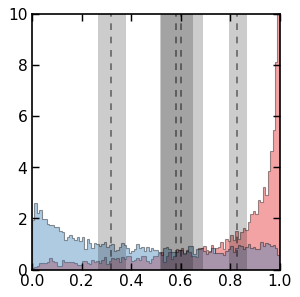

In [62]:
print 'average :', np.mean(bwei*cuts, axis=0)/np.sum(bwei, axis=0)
print 'std     :', np.std (bwei*cuts, axis=0)/np.sum(bwei, axis=0)

m_cuts = np.mean(cuts, axis=0)
e_cuts = np.std (cuts, axis=0)

plt.figure(figsize=(4,4))
plt.hist(X[Y==1],bins=100, range=[0,1], alpha=0.4, weights=W[Y==1], histtype='stepfilled',lw=1, normed=True)
plt.hist(X[Y==0],bins=100, range=[0,1], alpha=0.4, weights=W[Y==0], histtype='stepfilled',lw=1, normed=True)
# plt.yscale('log')

for i,x in enumerate(m_cuts):
    plt.axvline(x, ls='--',c='k',alpha=0.5, label=i)
    plt.axvspan(x - e_cuts[i]/2, x + e_cuts[i]/2,facecolor='k',alpha=0.2)
plt.show()

average : [ 0.828  0.581  0.602  0.32 ]
std     : [ 0.067  0.129  0.167  0.11 ]


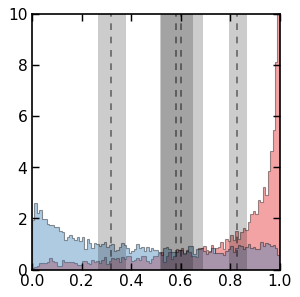

In [63]:
print 'average :', np.mean(cuts, axis=0)
print 'std     :', np.std (cuts, axis=0)

m_cuts = np.mean(cuts, axis=0)
e_cuts = np.std (cuts, axis=0)

plt.figure(figsize=(4,4))
plt.hist(X[Y==1],bins=100, range=[0,1], alpha=0.4, weights=W[Y==1], histtype='stepfilled',lw=1, normed=True)
plt.hist(X[Y==0],bins=100, range=[0,1], alpha=0.4, weights=W[Y==0], histtype='stepfilled',lw=1, normed=True)
# plt.yscale('log')

for i,x in enumerate(m_cuts):
    plt.axvline(x, ls='--',c='k',alpha=0.5, label=i)
    plt.axvspan(x - e_cuts[i]/2, x + e_cuts[i]/2,facecolor='k',alpha=0.2)
plt.show()